In [1]:
from attrbench.suite import SuiteResult
from scripts.statistics.df_extractor import DFExtractor
from scripts.statistics import correlation, clustering, wilcoxon, krippendorff, boxplot, wilcoxon_summary
from collections import defaultdict

In [5]:
RES_OBJ = SuiteResult.load_hdf("../../out/ImageNet_resnet18.h5")
EXCLUDE = ["Random_pos_only", "GradCAM_no_relu", "GuidedGradCAM_no_relu", "EdgeDetection"]

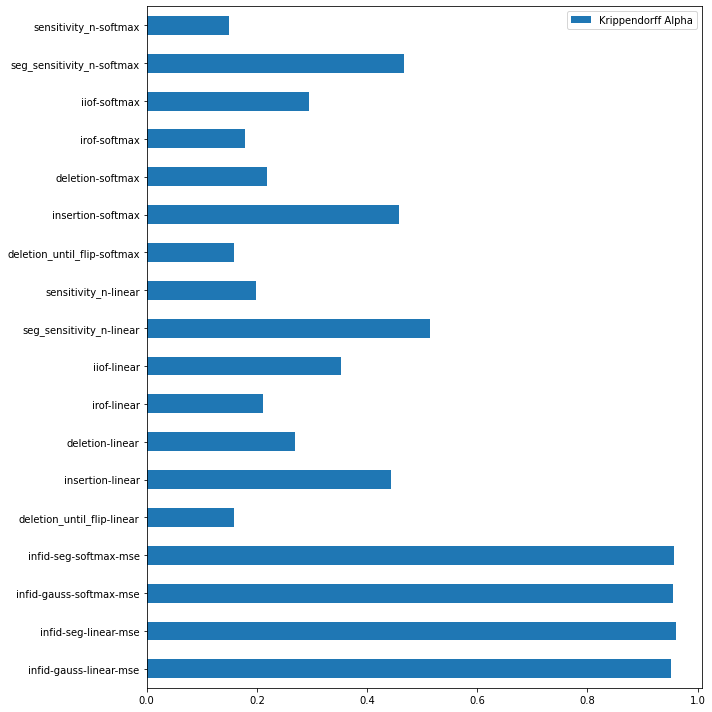

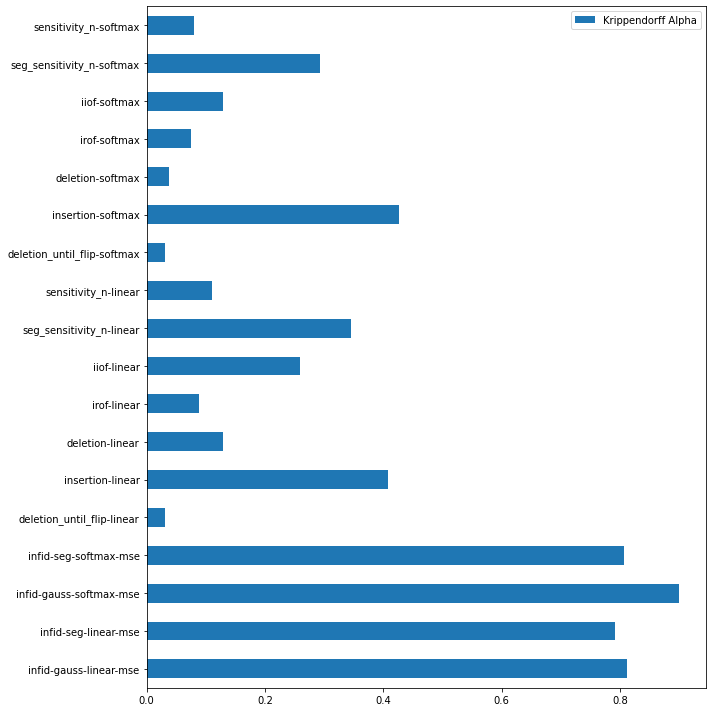

In [6]:
dfe = DFExtractor(RES_OBJ, EXCLUDE)
dfe.add_infidelity("mse", "linear")
dfe.add_infidelity("mse", "softmax")
dfe.compare_activations(["linear", "softmax"], "constant")
#krippendorff(dfe, "Random")
#krippendorff(dfe, "Random", exclude_non_significant=True)
wilcoxon_summary(dfe, defaultdict("cohend"), "Random")


In [8]:
"""
dfe = DFExtractor(RES_OBJ, EXCLUDE)
dfe.compare_maskers(["constant", "random", "blur"], "softmax", metric_group="deletion")
boxplot(dfe, "box.png")
"""

'\ndfe = DFExtractor(RES_OBJ, EXCLUDE)\ndfe.compare_maskers(["constant", "random", "blur"], "softmax", metric_group="deletion")\nboxplot(dfe, "box.png")\n'